# Lecture 5 — Classical/Frequentist Statistical Inference: I

[Open this notebook in Google Colab](https://colab.research.google.com/github/daanmeerburg/Statistics_meerburg_2026//blob/main/Lectures/Lecture_05_PDM.ipynb)


**Lecturer:** P. D. Meerburg 

*Heavily based on materials by Davide Gerosa (astroML, 2022) and collaborators. See [here](https://github.com/dgerosa/astrostatistics_bicocca_2023/blob/main/README.md) for credits.*

##### Reading:

- [Ivezic textbook](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy) Chapter 4. 



---

>## Statistical Inference

Statistical *inference* is about drawing conclusions from data, specifically determining the properties of a population by data sampling.

Three examples of inference are:
1. What is the best estimate for a model parameter?
2. How confident we are about our result?
3. Are the data consistent with a particular model/hypothesis?

### Some Terminology

* We typically study the properties of some ***population*** by measuring ***samples*** from that population. The population doesn't have to refer to different objects. E.g., we may be (re)measuring the position of an object at rest; the population is the distribution of (an infinite number of) measurements smeared by the uncertainty, and the sample are the measurement we've actually taken.


* A ***statistic*** is any function of the sample. For example, the sample mean is a statistic. But also, "the value of the first measurement" is also a statistic. Don't stress too much about how to make a statistic; it's just a way of summarizing data in a way that helps reveal the presence of a signal. We will meet ways of finding the optimal statistic for a given scenario. Note that we sometimes refer to these as **summary statistics**, in light of machine learning which does not rely on standard summaries to analyse data and look for patterns. 


* To conclude something about the population from the sample, we develop ***estimators***. An estimator is a statistic, a rule for calculating an estimate of a given quantity based on observed data.


* There are ***point*** and ***interval estimators***. The point estimators yield single-valued results (example: the position of an object), while with an interval estimator, the result would be a range of plausible values (example: confidence interval for the position of an object).


* Measurements have **uncertainties** (not errors) and we need to account for these (sometimes they are unknown). Data are not variables but fixed values.

### Frequentist vs. Bayesian Inference

There are two major statistical paradigms that address the statistical inference questions: 
- the **classical**, or **frequentist** paradigm,
- the **Bayesian** paradigm.

While most of the statistics and machine learning is based on the classical paradigm, Bayesian techniques are being embraced by the statistical and scientific communities at an ever-increasing pace... especially in cosmology and astrophysics (and to some degree in particle physics, see e.g. ).

#### Key differences
- **Definition of probabilities**:
    - In ***frequentist inference***, probabilities describe the ***relative frequency of events*** over repeated experimental trials. 
    - In ***Bayesian inference***, probabilities instead quantify our ***subjective belief about experimental outcomes, model parameters, or even models themselves***. 
    
    
- **Quantifying uncertainty**:
    - In ***frequentist inference*** we have ***confidence levels*** that describe the distribution of the measured parameter from the data around the true value.
    - In ***Bayesian inference*** we have ***credible regions*** derived from posterior probability distributions (we'll meet these later). These encode our "***belief spread***" in (measured) model parameters. 

**EXAMPLE 1**

Let's say that you get the results from your astrostistics exam. Any given test result might not give you your "real" knowledge of the subject (a lucky or unlucky question; sick on the day of the exam, etc.).  But it gives us a way to *estimate* it (and the possible range of exam scores you might get).  
- For a frequentist, the best estimator is the average of many test results. So, if you take my exam 10 times and got a sample mean of 8, then that would be the estimator of your true knowledge.
- On the other hand, a Bayesian would say: "*I studied enough to get a mean score of 7.5 with a standard deviation of .5 points*".  So they will use that as "prior" information, so getting 10 would be a 5$\sigma$ outlier and failing the exam (<5.5), both extremely improbable.



There's nothing mysterious about priors. It simply encodes any previous knowledge or information we have about our experiment. If I'm measuring a mass (of a particle, star, black hole), I should get a positive number. No matter what I do with data, codes, and estimators, a mass should always be positive. Bayesian analysis allows you to build this information explicitly into the analysis. 

**EXAMPLE 2**

The following article provides a nice example that is visualized below (without the detailed math): [Efron 1978 "Controversies in the Foundations of Statistics"](http://www.jstor.org/stable/2321163?seq=1#page_scan_tab_contents).

The IQ of the population (whatever that means) has mean of 100 and standard deviation 15. Alice takes a test which returns an IQ of 160. Given these pieces of information, what is the IQ of Alice?

Let's see the result **before the math**:

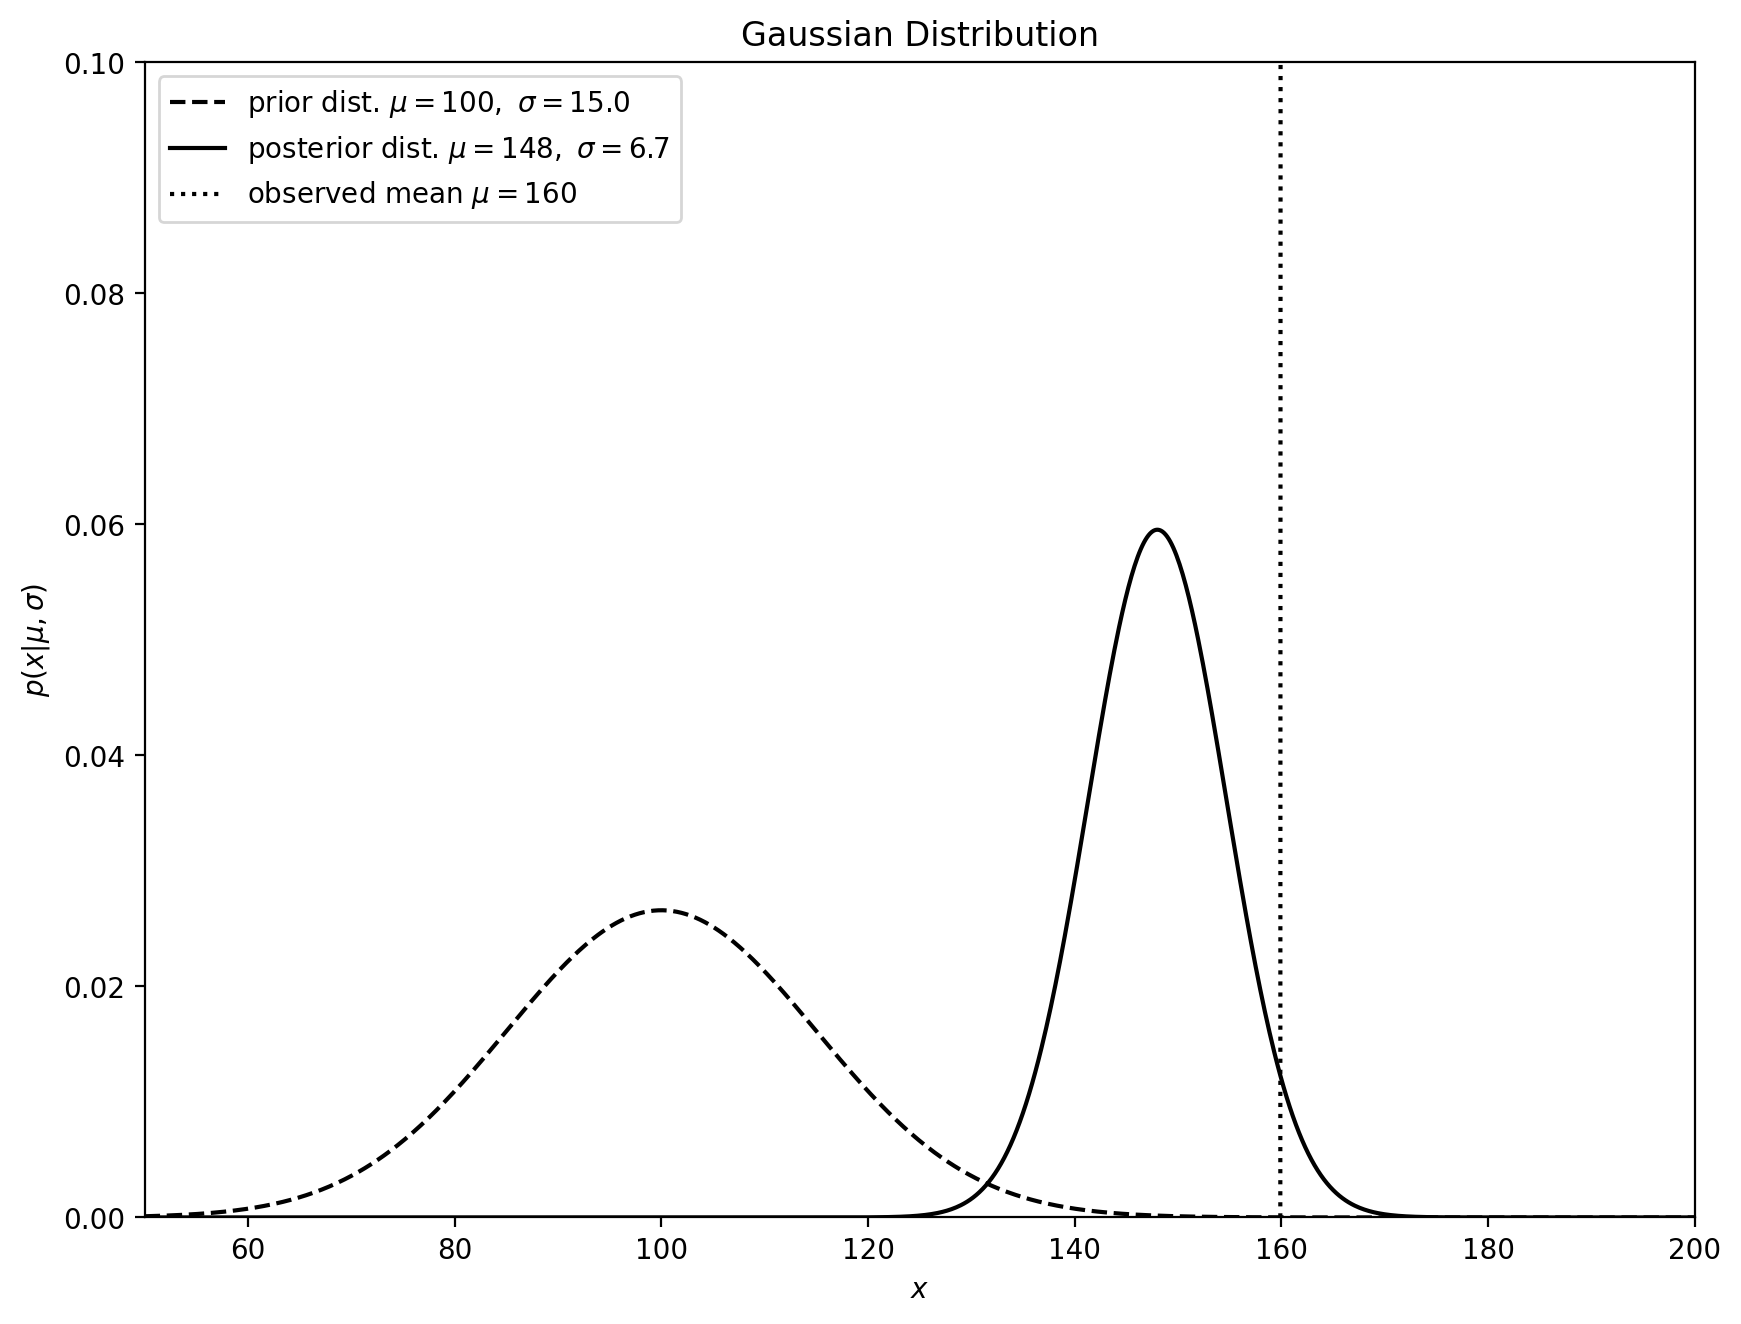

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [15, 6.7, 1] #complete with the prior width of IQ distribution
linestyles = ['--', '-', ':']
mu_values = [100, 148, 160] #complete with the prior mean of IQ distribution
labeltext = ['prior dist.', 
             'posterior dist.', 
             'observed mean']
xplot = np.linspace(50, 200, 1000)

#------------------------------------------------------------
# Plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))

for sigma, ls, mu, lab in zip(sigma_values, 
                              linestyles, 
                              mu_values, 
                              labeltext):
    
    # Create a gaussian / normal distribution
    dist = norm(mu, sigma)

    if sigma > 1:
        plt.plot(xplot, dist.pdf(xplot), 
                 ls=ls, c='black',
                 label=r'%s $\mu=%i,\ \sigma=%.1f$' % (lab, mu, sigma))
    else:
        plt.plot([159.9, 160.1], [0, 0.8], 
                 ls=ls, color='k', label=r'%s $\mu=%i$' % (lab, mu))
        
plt.xlim(50, 200)
plt.ylim(0, 0.1)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

The end result (skipping over the detailed math) is that Alice's is not 160, but rather 148! More specifically, my Bayesian measurement is that $p(141.3\le \mu \le 154.7 \, | \, \overline{x}=160) = 0.683$ (i.e. there's a probability of 68% that Alice's IQ is between 141.3 and 154.7). This estimate incorporates not only the test I made to that person, but also the prior information of how the IQ distribution is calibrated. Note that I found this somewhat confusing in the paper above, but the calibration here in some sense determined what Efron refers to $\sigma/\sqrt{n}$ -- this is kind of important here since the difference between frequentists and Bayesian inference of the IQ is amplified when you have low number statistics (in this case $n = 4$). For low number statistics, your prior believe takes on more weight. As we improve the `calibration' by taking more samples, $\sigma/\sqrt{n}$ would decrease and the two results should become more aligned. We will see this more explicitly when we show the math behind the results above. 

Note that we already encountered the effect of priors (remember the Monty Hall problem?) and the huge influence they have on the outcome.

This all seems totally fine; where's the controversy with Bayesian methods? The controversy arises when we don't know the prior distribution (at least not explicitly! There's always a prior!), or when the parameter is fixed, but we are trying to experimentally verify it (e.g., the speed of light). We'll return to this.

>## Maximum Likelihood Estimation (MLE) <a class="anchor" id="two"></a>

Let's talk about maximum likelihood estimation ($\S 4.2$ in the textbook), which is relevant to both Bayesian and Frequentist approaches.

### Maximum Likelihood Approach

Maximum likelihood estimation follows this blueprint:

1. **Hypothesis**: Formulate a model, a *hypothesis*, about how the data are generated. For example, the data are a measurement of some quantity with Gaussian random uncertainties (i.e., each measurement is equal to the true value, plus a deviation randomly drawn from the normal distribution). Models are typically described using a set of model parameters $\boldsymbol{\theta}$, and written as $\boldsymbol{M}(\boldsymbol{\theta})$.


2. **Maximum Likelihood Estimation**: Search for the "best" model parameters $\boldsymbol{\theta}$ which maximize the ***likelihood*** $L(\boldsymbol{\theta}) \equiv p(D|M)$ (probability of the data given the model). This search yields the MLE *point estimates*, $\boldsymbol{\theta^0}$.


3. **Quantifying Estimate Uncertainty**: Determine the confidence region for model parameters, $\boldsymbol{\theta^0}$. Such a confidence estimate can be obtained analytically (possibly with some approximations), but can also be done numerically for arbitrary models using general frequentist techniques, such as bootstrap, jackknife, and cross-validation (we'll come to these later).


4. **Hypothesis Testing**: Perform hypothesis tests as needed to make other conclusions about models and point estimates. Possibly GOTO #1.

**EXAMPLE 3: Measuring the Position of a Quasar**

Let's assume we wish to estimate the position $x$ of a quasar from a series of individual astrometric measurements.

1. We adopt a model where the observed quasar does not move, and has individual measurement uncertainties 
2. We derive the expression for the likelihood of there being a quasar at position $x_0$ that gives rise to our individual measurements. We find the value of $\hat x_0$ for which our observations are maximally likely.
3. We determine the uncertainties (confidence intervals) on our measurement.
4. We test whether what we've observed is consistent with our adopted model. For example, is it possible that the quasar was really a misidentified star with measurable proper motion?

Note: in the text to come, I will use $\mu$ instead of $x_0$ to denote the true position of the quasar. This is to avoid potential confusion with the first (or zeroth) measurement of $x$.

Keep this blueprint in mind. Now we have to go run through some math.

### The Likelihood Function

If we know the distribution from which our data were drawn (or make a hypothesis about it), then we can compute the **probability** of our data being generated.

For example, if our data are generated by a Gaussian process with mean $\mu$ and standard deviation $\sigma$, then the probability density of a certain value $x$ is

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

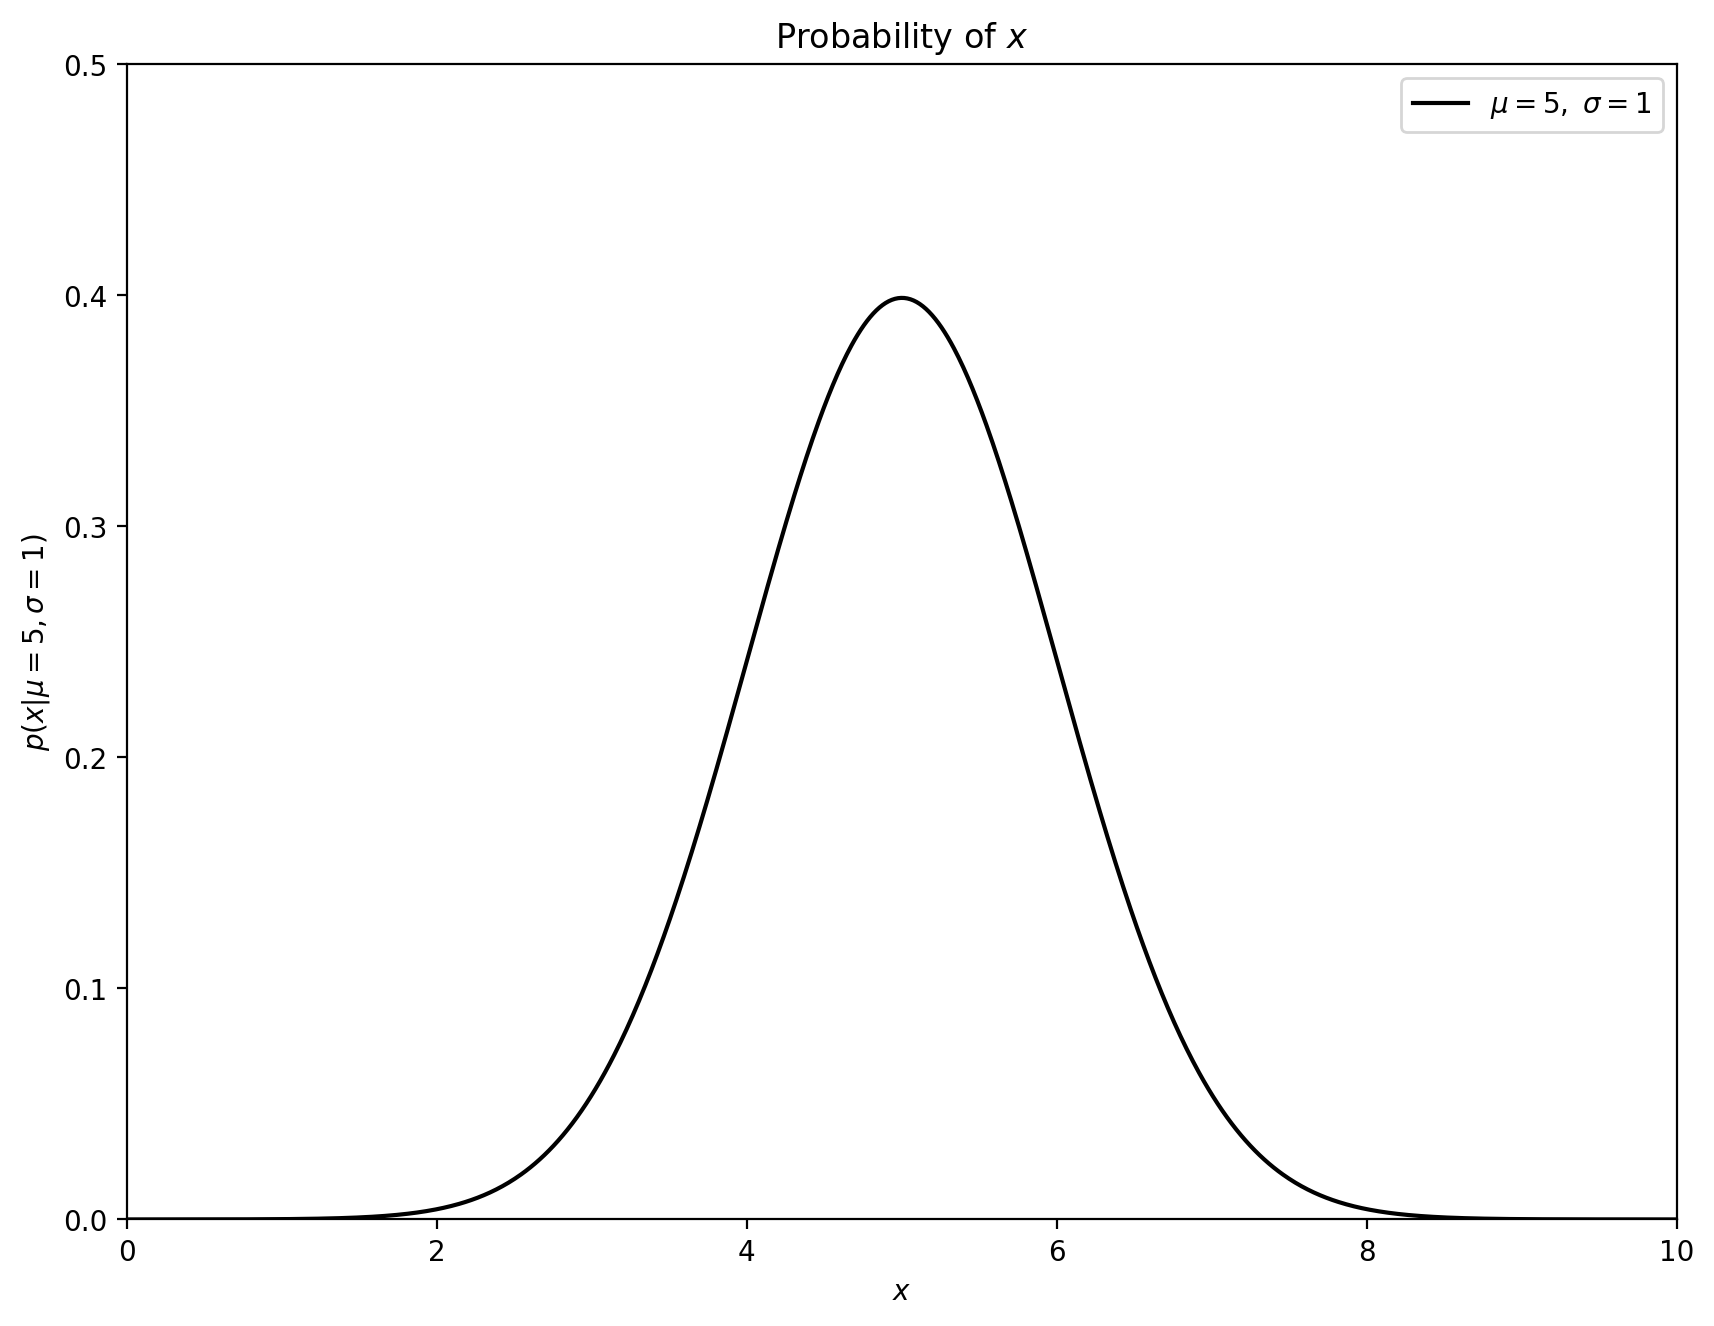

In [2]:
# Plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(5, 1)
x = np.linspace(0, 10, 1000)
plt.plot(x, dist.pdf(x), c='black',label=r'$\mu=5,\ \sigma=1$')

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu=5,\sigma=1)$')
plt.title('Probability of $x$')

plt.legend()

In [3]:
# Useful to know that you can do this...
norm?

Signature:       norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x1239c4830>
File:            ~/Desktop/PhD/Teaching/Statistics in Modern Physics/course/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distri

If we want to know the total probability of our ***entire*** data set (as opposed to one measurement) then we must compute the ***product*** of all the individual probabilities (assuming the individual measurements are independent):

$$L \equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^N p(x_i|M(\theta)),$$

where $M$ is the *model* and $\theta$ refers collectively to the $k$ parameters of the model, which can generally be multi-dimensional. In words...

> $L(\{x_i\})\equiv$ the probability of the data given the model parameters. 

If we consider $L$ as a function of the model parameters, we refer to it as

> $L(\theta)\equiv$ likelihood of the model parameters, given the observed data. 

Careful what's been done here: we're thinking about the probability of an event as a function of the model parameters. This is the crucial point behind MLE (and inference in general).

Note:
- [Jeynes](https://www.amazon.com/Probability-Theory-Science-T-Jaynes/dp/0521592712) is quite strict on how refer to the likelihood of model parameters versus the probability of the data, but we'll be a bit more lax.
- while the components of $L$ may be normalized pdfs, their product is not.
- the product can be very small, so we often take the log of $L$. 
- we're assuming the individual measurements are independent of each other.

Aside on the normalization and functional dependence of $L(\bm{\theta})$:

$$L(\bm{\theta}) \equiv p(\mathbf{x}|\bm{\theta}) = p(\textrm{seeing the observed data \textit{given} our model parameters})$$
where 
- Data Vector: $\mathbf{x} = \{x_1, ..., x_n\}$
- Parameter Vector: $\bm{\theta} = \{\theta_1, ..., \theta_m\}$

It is a probability distribution over the data: 

$$ \int p(\mathbf{x}|\bm{\theta})\; {\rm d}^n \mathbf{x} = 1$$

but not over the parameters:

$$ \int p(\mathbf{x}|\bm{\theta})\; {\rm d}^m \bm{\theta} \neq 1$$

Thus, even though $L(\bm{\theta})$ is a probability distribution (over the data), that doesn't matter for us because
 - We are studying how the likelihood is affected by changing parameters, making it a function of the parameters $\bm{\theta}$
 - We only have one observation of the data, so we can not explore the sample space of the data

We can write $L$ out as

$$L = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

and simplify to

$$L = \left( \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments, which will make things easier to deal with later.

If you have done $\chi^2$ analysis (e.g., doing a linear least-squares fit), then you might notice that the argument of the exponential is just 

$$\exp \left(-\frac{\chi^2}{2}\right).$$

That is, for our gaussian distribution

$$\chi^2 = \sum_{i=1}^N \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

So for Gaussians **maximizing the likelihood or log-likelihood is the same as minimizing $\chi^2$**.  In both cases we are finding the most likely values of our model parameters (here $\mu$ and $\sigma$).  


### Properties of ML Estimators

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

* **They are consistent estimators**. They converge to the true parameter value as $N\to\infty$.


* **They are asymptotically normal estimators**. As $N\to\infty$ the distribution of the parameter estimate approaches a normal distribution, centered at the MLE, with a certain spread.


* **They asymptotically achieve the theoretical minimum possible variance, called the Cramér–Rao bound**. They achieve the best possible uncertainty given the data at hand; no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate (see eq. 3.33 in the textbook).

This is why you've been doing $\chi^2$ all the time. You want an MLE, which is the same as minimizing $\chi^2$ ***if*** data are Gaussian. **This is reasonable because of the Central Limit Theorem, but not always true!** 

### The Key Idea Behind Maximum Likelihood Estimation

Let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu,\sigma)$ values of that distribution (i.e., the parameters).

Then Maximum Likelihood Estimation method tells us to think of the likelihood as a ***function of the unknown model parameters***, and to ***find the parameters that maximize the value of $L$***. Those will be our *Maximum Likelihood Estimators* for for the true values of the model.

Let's take a look at this [animation of linear least squares fitting](https://yihui.org/animation/example/least-squares/).

They are trying to fit a line to some data by trying different intercepts and slopes. The red dashed lines show the difference (*residual*) between the model predicted value and the actual value. These are squared and summed ($\chi^2$) and plotted as the $y$-axis in the right hand plot. The best-fit model parameters minimize the $\chi^2$ value and maximize the likelihood.

>## MLE applied to a Homoscedastic Gaussian <a class="anchor" id="three"></a>

Let's take a look at our astrometry example (position of quasars), using a model where all the measurements have the same uncertainty, drawn from a normal distribution, $N(0, \sigma)$.

As mentioned back in our early lectures, uncertainties being the same is known as having **homoscedastic** uncertainties which just means "uniform uncertainties".  Later we will consider the case where the measurements can have different uncertainties ($\sigma_i$) which is called **heteroscedastic**.

We have an experiment with the set of measured positions $D=\{x_i\}$ in 1D with Gaussian uncertainties, and therefore:

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Note that that is $p(\{x_i\})$ not $p(x_i)$, that is the probability of the full data set, not just one measurement. If $\sigma$ is both constant and *known*, then this is a one parameter model with $k=1$ and $\theta_1=\mu$. 

We're assuming we know the spread of the measurments $\sigma$ here (say it depends on the properties of the telescope), but of course that's not always the case.

As we found above, likelihoods can be really small, so let's define the **log-likelihood function** as ${\ln L} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$.  Note that any constants in $L$ have the same effect for all model parameters, so constant terms can be ignored.  

In this case we then have 

$${\ln L} = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Take a second and make sure that you understand how we got there.  It might help to remember that above, we wrote

$$L = \prod_{i=1}^N \left( \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right).$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\ln L}$ is zero:

$$\frac{d\;{{\ln L}}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma^2} = 0.$$

Note: 
- We should also check that the $2^{\rm nd}$ derivative is negative, to ensure this is the *maximum* of $L$.
- Bimodality? We need something more.
- Any constants in $\ln L$ disappear when differentiated, so constant terms can typically be ignored. This will change if we're trying to select between different models, rather than just parameter estimation within a single model as we're doing here.

Since $\sigma = {\rm constant}$ (not always, but here at least), that says 

$$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that

$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i,$$

***which is just the sample arithmetic mean of all the measurements!*** Thus, **the sample mean is an ML estimator**. We got there in a roundabout way, but still pretty easy.

So at the end of the day, if you know the $\sigma$ of your quasar measurements (perhaps because it comes from the property of the telescope), just compute a mean.

## Quantifying Estimate Uncertainty <a class="anchor" id="four"></a>

Our ML estimate of $\mu$ is not perfect. The uncertainty of the estimate is captured by the shape and distribution of the likelihood function, but we'd like to capture that with a few numbers.

Note: $\sigma$ is *not* the uncertainty on $\mu$!

The ***asymptotic normality of MLE*** is invoked to approximate the likelihood function as a Gaussian (or the $\ln L$ as a parabola), i.e. we take a Taylor expansion around the MLE, keep terms up $2^\mathrm{nd}$ order, then *define* the uncertainty on our model parameters as:

$$\sigma_{jk} = \sqrt{[F^{-1}]_{jk}}, $$

where

$$ F_{jk} = - \frac{d^2 \ln L}{d\theta_j d\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$

The matrix $F$ is known as the **Fisher information matrix**.  The elements $\sigma^2_{jk}$ are known as the ***covariance matrix***.

Has anybody heard about the Fisher matrix before? In what context?
*Digression*: a nice write-up on the ["Use and Abuse of the Fisher Information Matrix" by Vallisneri (2007)](https://arxiv.org/abs/gr-qc/0703086).


The marginal error bars for each parameter, $\theta_i$ are given by the diagonal elements, $\sigma_{ii}$. These are the "error bars" that are typically quoted with each measurement. Off diagonal elements, $\sigma_{ij}$, arise from any correlation between the parameters in the model.

In our example of a homoscedastic Gaussian, the uncertainly on the mean is 

$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

We find

$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$

since, again, $\sigma = {\rm constant}$.  

Then 

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you should be familiar with. 

### What is $\pm \sigma$? Errors as Gaussian Approximations to the Likelihood Function

Especially in particle physics, the gold standard for detecting a something new is "$5 \sigma$".


The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor series and retaining terms up to second order (essentially, $\ln L$ is approximated by a parabola, or an ellipsoidal surface in multidimensional cases, around its maximum). If this expansion is exact (as is the case for a Gaussian error distribution), then we've completely captured the error information.

In general, this is not the case and the likelihood surface can significantly deviate from a smooth elliptical surface. Furthermore, it often happens in practice that the likelihood surface is multimodal. It is always a good idea to visualize the likelihood surface when in doubt (see examples in §5.6 in the textbook).

The $(\hat \mu - \sigma_\mu, \hat \mu + \sigma_\mu)$ range gives us a **confidence interval**.

In frequentist interpretation, if we repeated the same measurement 100 times, we'd find for 68 experiments the true value was within their computed confidence intervals ($1 \sigma$ errors).

>## MLE applied to a Heteroscedastic Gaussian <a class="anchor" id="five"></a>

Now let's look at a case where the uncertainties are heteroscedastic.  For example if we are measuring the position of a quasar by performing $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement, $\sigma_i$ is known (say the setups in your telescope changed: you know what they are, but they're different every night).  Since $\sigma$ is not a constant, then following the above, we have

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\ln L}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} = \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\hat \mu}{\sigma_i^2},$$

yields a MLE solution of 
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$




>## Working with non-Gaussian Likelihoods <a class="anchor" id="six"></a>

As an example of MLE with non-Gaussian probability density we can use the same formalism above for a Poisson distribution. In this case we write the probability disrtibution as

$$p(x_i|\mu) = \frac{e^{-\mu}\mu^{x_i}}{x_i!}$$

with $\mu$ the average number of events, $N$ is the number of observed events, and $\{x_i\}$ are the measured data.

As we saw before, this distribution is particularly useful for characterizing the number of soldiers in the Prussian army killed accidentally by horse kicks.

We can then write the likelihood as

$$L \equiv p(\{x_i\}|\mu) = \prod_{i=1}^{N} \frac{e^{-\mu}\mu^{x_i}}{x_i!}$$

and the $\ln L$ as

$$\ln L = \sum_{i=1}^{N} \ln \bigg( \frac{e^{-\mu}\mu^{x_i}}{x_i!} \bigg)$$

$$= \sum_{i=1}^{N} -\mu + x_i \; \ln(\mu) - \ln({x_i!})$$

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rb/fzfc6c755m97072_t90425cw0000gn/T/ipykernel_22132/1257100752.py:12: SyntaxWarning: invalid escape sequence '\m'
  bins=np.arange(0,26), label='$\mu=' + str(mu) + '$')


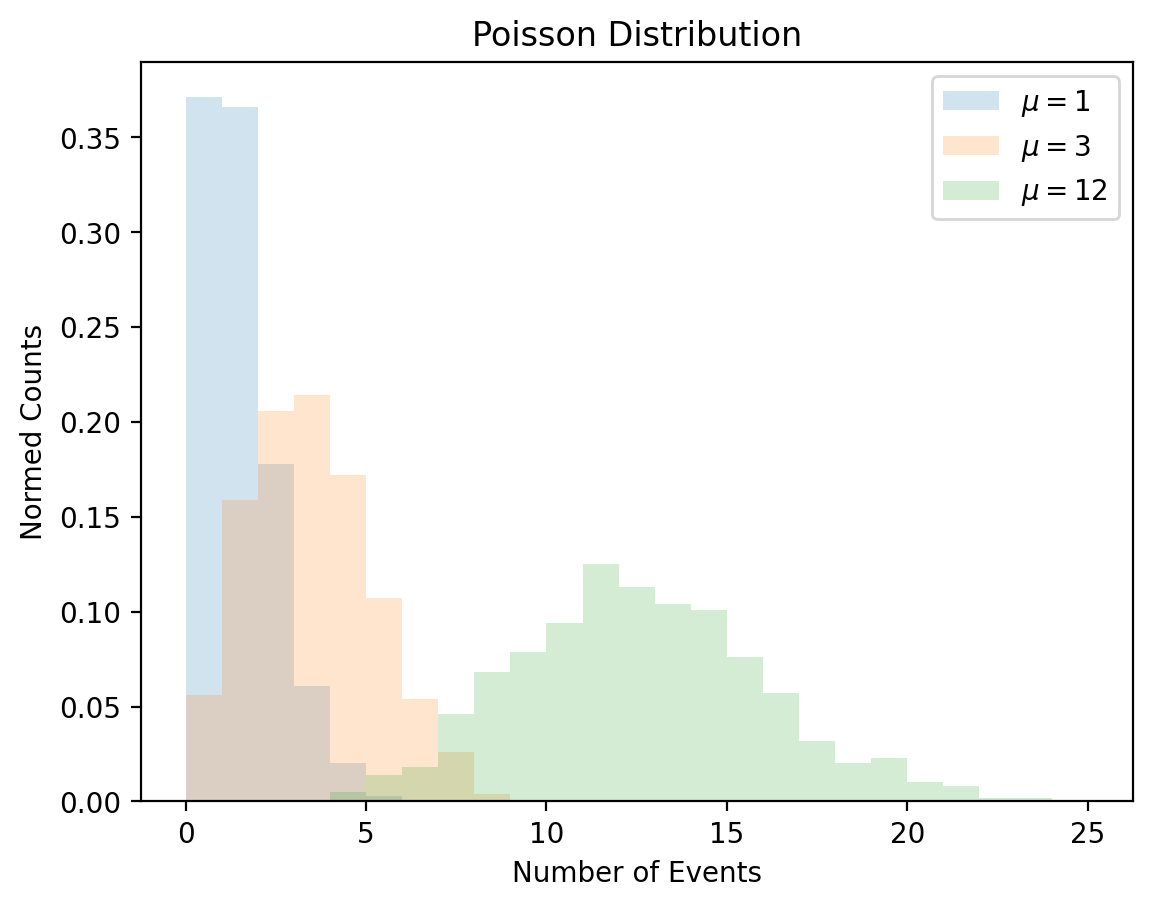

In [4]:
from scipy.stats import poisson
import seaborn as sns  #for color palettes

# generate samples for different values of mu
kpts=np.arange(0,25) # x-axis points
for mu, c in zip([1,3,12], # mean values
                 sns.color_palette()[:4]): # colors
    # random draws
    randomVariates = poisson.rvs(mu, size=1000)
    # histogram of random draws
    plt.hist(randomVariates, density=True, color=c, alpha=0.2, 
             bins=np.arange(0,26), label='$\mu=' + str(mu) + '$')

plt.legend()
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Normed Counts");
plt.show()

(which also presented an opportunity to introduce the `seaborn` package for nice plotting)

10.606606606606608


<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rb/fzfc6c755m97072_t90425cw0000gn/T/ipykernel_22132/2129194206.py:17: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(mu_proposed,lnL_scan, label = 'Pois($\hat{\mu}$)')
/var/folders/rb/fzfc6c755m97072_t90425cw0000gn/T/ipykernel_22132/2129194206.py:21: SyntaxWarning: invalid escape sequence '\h'
  plt.axvline(findmax,c='red', label='MLE $\hat{\mu}$') # vertical line at max lnL
/var/folders/rb/fzfc6c755m97072_t90425cw0000gn/T/ipykernel_22132/2129194206.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(12,c='black',ls='dotted', label='true $\mu$') # vertical line at true mu


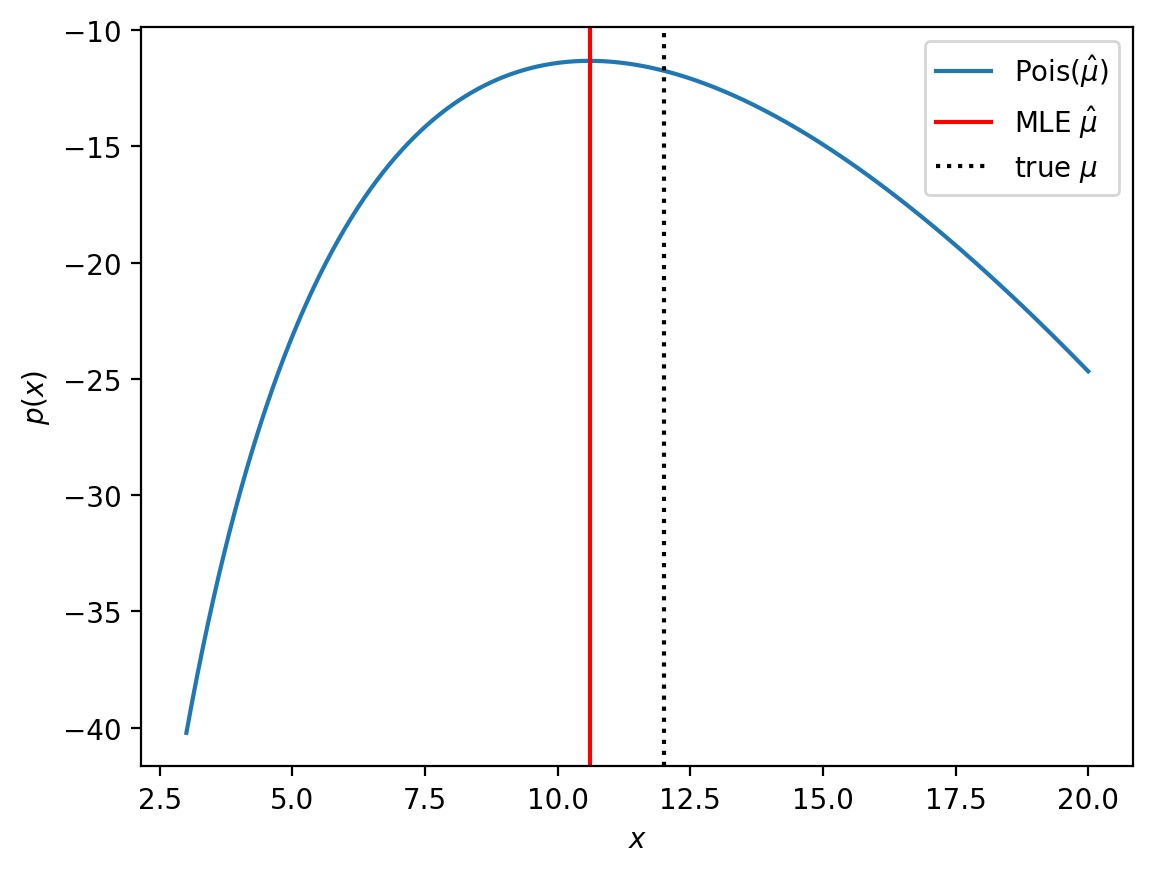

In [8]:
poisson_data = poisson.rvs(12, size=5) # generate 5 random draws from a Poisson distribution with mu=12

# Scan across 1000 possible mu values from 3 to 20.
mu_proposed = np.linspace(3,20,1000)

# compute the lnL for each possible mu.
lnL_scan = [] # to hold the lnL values
for mu in mu_proposed:
    lnL_temp = poisson.logpmf(poisson_data, mu=mu) # gives you the log prob. density; useful!
    lnL_temp = np.sum(lnL_temp) # sum over the log pmf of all data points
    lnL_scan.append( lnL_temp ) # append to list
    
# convert to numpy array
lnL_scan = np.array(lnL_scan)

# mu_proposed that maximizes the lnL.
plt.plot(mu_proposed,lnL_scan, label = 'Pois($\hat{\mu}$)')

findmax = mu_proposed[np.argmax(lnL_scan)]
print(findmax)
plt.axvline(findmax,c='red', label='MLE $\hat{\mu}$') # vertical line at max lnL

plt.axvline(12,c='black',ls='dotted', label='true $\mu$') # vertical line at true mu
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

### Maximizing the $\ln L$ 

For the Poisson distribution we can solve for the maximum likelihood analytically

$$\frac{\partial \; L(\mu)}{\partial \; \mu} = \frac{\partial \; }{\partial \; \mu} \bigg( \sum_{i=1}^{N} -\mu + x_i \; \ln(\mu)\bigg)$$

$$0 = \sum_{i=1}^{N} \bigg( -1 + \frac{x_i}{\mu} \bigg)$$
$$\hat\mu = \frac{1}{N} \sum_{i=1}^{N} x_i $$

What do you know!? The same as for a homoescedastic Gaussian! 

***For many likelihoods we cannot solve for the maximum analytically, and we have to resort to numerical solutions.*** We'll treat these in detail later using MCMC and robust statistics that account for outliers.

In [6]:
np.mean(poisson_data)

np.float64(12.6)

>## Assignment: Quasars part II

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic (same for all measurements). Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`). 
- Compare it with the MLE estimator derived above.

### Part 2

Check if the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentiation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above.
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees).

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurement has a $\sigma_i$ that is normally distributed with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case
